# Kernel density estimation

In [8]:
using Distributions, Plots

In [9]:
function densidad(xobs, h; kernel = "gaussian")
    n = length(xobs)
    w1(x) = exp((-x^2) / 2) / √(2π)
    f1(x) = (1/(n*h)) * sum(w1.((x .- xobs) ./ h))
    w2(x) = (abs(x) < 1) / 2
    f2(x) = (1/(n*h)) * sum(w2.((x .- xobs) ./ h))
    w3(x) = (abs(x) < 1) * (1 - abs(x))
    f3(x) = (1/(n*h)) * sum(w3.((x .- xobs) ./ h))
    w4(x) = (abs(x) < √5) * (3/4) * (1 - x^2/5) / √5
    f4(x) = (1/(n*h)) * sum(w4.((x .- xobs) ./ h))
    w5(x) = (abs(x) < 1) * (15/16) * (1 - x^2)^2
    f5(x) = (1/(n*h)) * sum(w5.((x .- xobs) ./ h))
    if kernel == "gaussian"
        return f1
    end
    if kernel == "rectangular"
        return f2
    end
    if kernel == "triangular"
        return f3
    end
    if kernel == "epanechnikov"
        return f4
    end
    if kernel == "biweight"
        return f5
    end
end

densidad (generic function with 1 method)

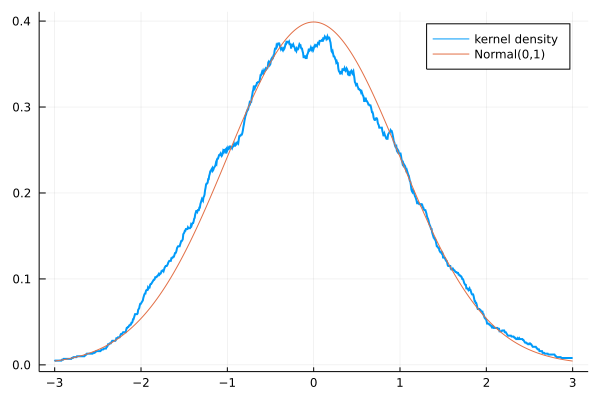

In [10]:
X = Normal(0,1)
n = 1000
h = 0.5
xobs = rand(X, n)
f = densidad(xobs, h, kernel = "rectangular")
x = range(-3, 3, length = 1000)
plot(x, f.(x), lw = 2, label = "kernel density")
plot!(x, pdf(X, x), label = "Normal(0,1)")

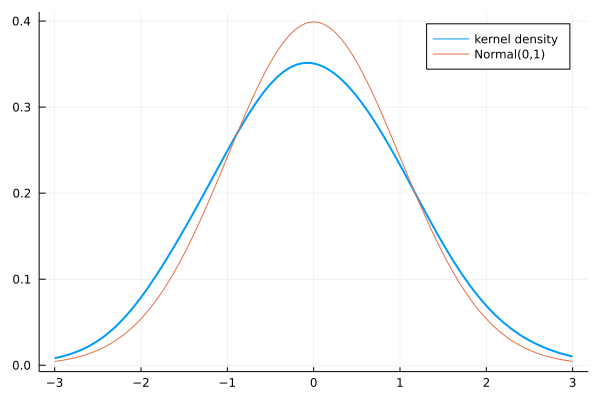

In [11]:
f = densidad(xobs, 0.5, kernel = "gaussian")
x = range(-3, 3, length = 1000)
plot(x, f.(x), lw = 2, label = "kernel density")
plot!(x, pdf(X, x), label = "Normal(0,1)")

Try again the code above and below with different values of the smoothing parameter $h$ and different kernels.

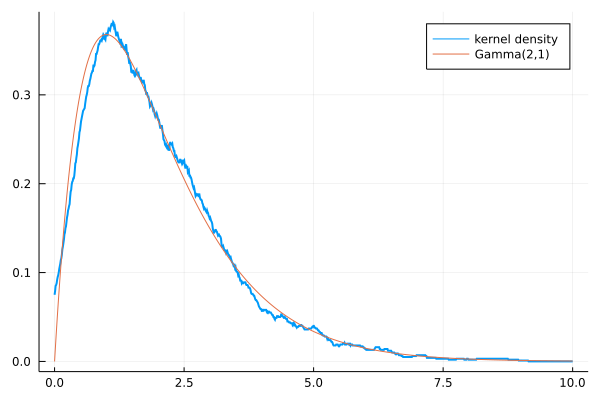

In [12]:
X = Gamma(2,1)
n = 1000
h = 0.5
xobs = rand(X, n)
f = densidad(xobs, h, kernel = "rectangular")
x = range(0, 10, length = 1000)
plot(x, f.(x), lw = 2, label = "kernel density")
plot!(x, pdf(X, x), label = "Gamma(2,1)")

search: issubnormal set_zero_subnormals get_zero_subnormals normpath

Couldn't find Normal
Perhaps you meant isreal, real, local or normpath


No documentation found.

Binding `Normal` does not exist.


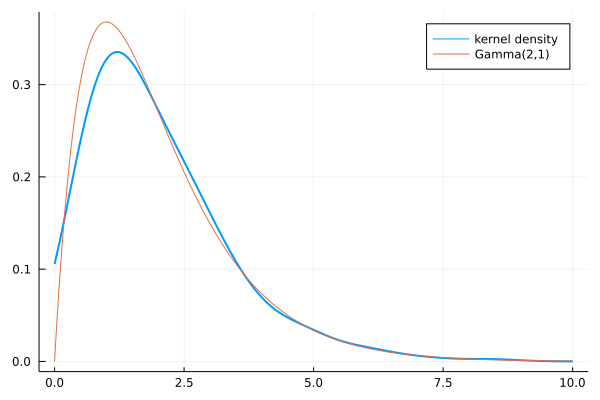

In [13]:
f = densidad(xobs, 0.5, kernel = "gaussian")
x = range(0, 10, length = 1000)
plot(x, f.(x), lw = 2, label = "kernel density")
plot!(x, pdf(X, x), label = "Gamma(2,1)")

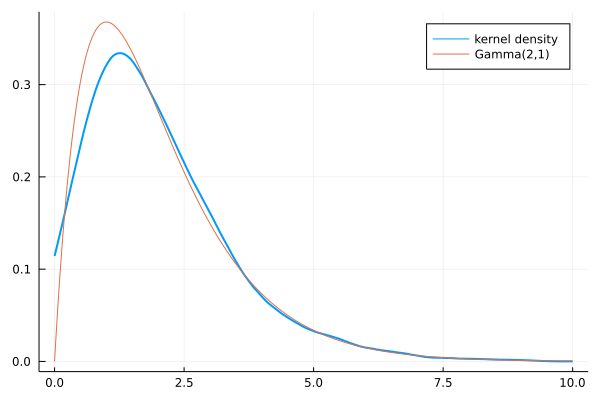

In [14]:
f = densidad(xobs, 0.5, kernel = "epanechnikov")
x = range(0, 10, length = 1000)
plot(x, f.(x), lw = 2, label = "kernel density")
plot!(x, pdf(X, x), label = "Gamma(2,1)")

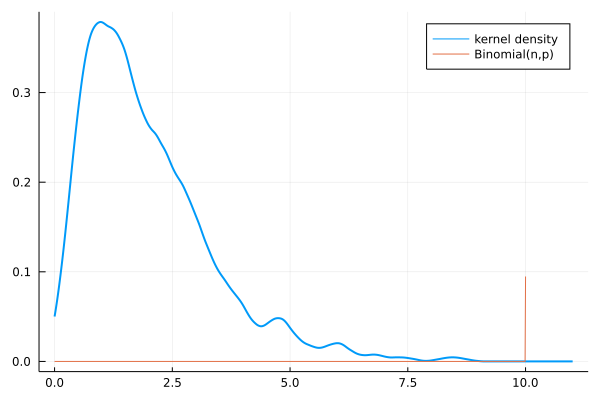

In [27]:
Y = Binomial(34,.4)
n = 1
h = 0.5
yobs = rand(Y,n)
g = densidad(xobs,h,kernel="biweight") 
y = range(0,11,length=1000)
plot(y,g.(y),lw = 2, label = "kernel density")
plot!(x,pdf(Y,y), label = "Binomial(n,p)")

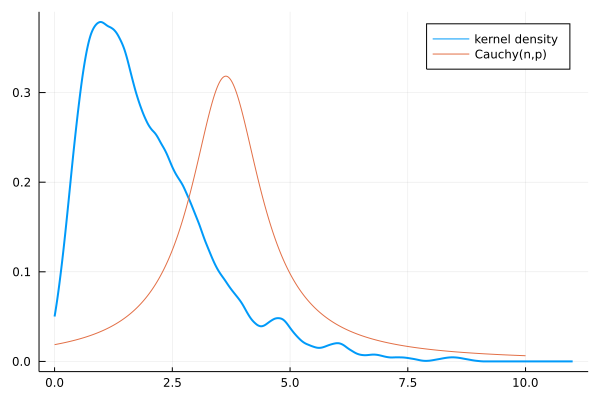

In [28]:
Y = Cauchy(4,1)
n = 1
h = 0.5
yobs = rand(Y,n)
g = densidad(xobs,h,kernel="biweight") 
y = range(0,11,length=1000)
plot(y,g.(y),lw = 2, label = "kernel density")
plot!(x,pdf(Y,y), label = "Cauchy(n,p)")